In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

names = pd.read_csv('./Names_2010Census.csv')
names.head()

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
0,SMITH,1,2442977,828.19,828.19,70.9,23.11,0.5,0.89,2.19,2.4
1,JOHNSON,2,1932812,655.24,1483.42,58.97,34.63,0.54,0.94,2.56,2.36
2,WILLIAMS,3,1625252,550.97,2034.39,45.75,47.68,0.46,0.82,2.81,2.49
3,BROWN,4,1437026,487.16,2521.56,57.95,35.6,0.51,0.87,2.55,2.52
4,JONES,5,1425470,483.24,3004.80,55.19,38.48,0.44,1,2.61,2.29


In [2]:
dist = names.groupby(names['name'].str.get(0))['name'].count()
dist_map= dist.to_dict()

<BarContainer object of 26 artists>

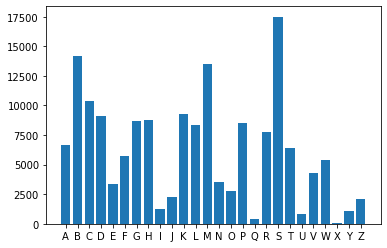

In [3]:
plt.bar(dist_map.keys(), dist_map.values())

In [4]:
# probability that a randomly selected name begins with the given char

In [5]:
prob_map = {k: 100* round((v / sum(dist)), 2) for k, v in dist.items()}

In [6]:
prob_map

{'A': 4.0,
 'B': 9.0,
 'C': 6.0,
 'D': 6.0,
 'E': 2.0,
 'F': 4.0,
 'G': 5.0,
 'H': 5.0,
 'I': 1.0,
 'J': 1.0,
 'K': 6.0,
 'L': 5.0,
 'M': 8.0,
 'N': 2.0,
 'O': 2.0,
 'P': 5.0,
 'Q': 0.0,
 'R': 5.0,
 'S': 11.0,
 'T': 4.0,
 'U': 1.0,
 'V': 3.0,
 'W': 3.0,
 'X': 0.0,
 'Y': 1.0,
 'Z': 1.0}

In [7]:
def get_cutoff(prob_map):
    # just cutoff when the probability from the first
    # subset surpasses 50; we're looking for two groups
    cumulative = 0
    for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        cumulative += prob_map.get(char)
        if cumulative > 50: break
    print(f'cumulative probability is {cumulative} for group up to letter {char}')
    return char

In [8]:
get_cutoff(prob_map)

cumulative probability is 54.0 for group up to letter L


'L'

In [9]:
def get_cutoff_for_n_groups(prob_map, n_groups):
    cumulative = 0
    target_prob = 100 / n_groups
    dist_map = { group: [] for group in range(n_groups) }
    i = 0
    current_group = dist_map[i]

    for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        dist_map[i].append(char)
        cumulative += prob_map.get(char)
        if cumulative > target_prob:
            i += 1
            current_group = dist_map[i]
            print(f'cumulative probability is {cumulative} for group up to letter {char}')
            cumulative = 0

    return dist_map

In [10]:
# for two services
get_cutoff_for_n_groups(prob_map, 2)

cumulative probability is 54.0 for group up to letter L


{0: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
 1: ['M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']}

In [11]:
# for three services
get_cutoff_for_n_groups(prob_map, 3)

cumulative probability is 36.0 for group up to letter G
cumulative probability is 35.0 for group up to letter P


{0: ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
 1: ['H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'],
 2: ['Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']}

In [12]:
# for six services
get_cutoff_for_n_groups(prob_map, 6)

cumulative probability is 19.0 for group up to letter C
cumulative probability is 17.0 for group up to letter G
cumulative probability is 18.0 for group up to letter L
cumulative probability is 17.0 for group up to letter P
cumulative probability is 20.0 for group up to letter T


{0: ['A', 'B', 'C'],
 1: ['D', 'E', 'F', 'G'],
 2: ['H', 'I', 'J', 'K', 'L'],
 3: ['M', 'N', 'O', 'P'],
 4: ['Q', 'R', 'S', 'T'],
 5: ['U', 'V', 'W', 'X', 'Y', 'Z']}